# PYTHON ML PROJECT :

## Book's rating Prediction


#  

### --------------------------------------------------------------------------------------------------------------------------------------------------------------
## Libraries Import
# 

In [1]:
#Importing Libraries :
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

### --------------------------------------------------------------------------------------------------------------------------------------------------------------
## Importing and preparing the dataset
(The dataset has already been cleared manually for some misformatted values in csv)

In [29]:
data = pd.read_csv("Input/books.csv", sep=",")

In [30]:
#DataFrame information :
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11127 non-null  int64  
 1   title               11127 non-null  object 
 2   authors             11127 non-null  object 
 3   average_rating      11127 non-null  float64
 4   isbn                11127 non-null  object 
 5   isbn13              11127 non-null  int64  
 6   language_code       11127 non-null  object 
 7     num_pages         11127 non-null  int64  
 8   ratings_count       11127 non-null  int64  
 9   text_reviews_count  11127 non-null  int64  
 10  publication_date    11127 non-null  object 
 11  publisher           11127 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


Useful fields:
- bookID to identify the book
- title to have an idea of what is the book
- authors, publisher, language_code, num_pages and publication_date to make potential link between several books / clustering
- average_rating main numerical parameter to evaluate the book that we will try to predict
- ratings_count will help us to understand the pertinence of a rating
- text_reviews_count may be useful to see the commitment of readers for the book

We can already remove isbn and isbn13 as other identifier won't be useful in our study

In [35]:
dfBooks = data.set_index("bookID").drop(['isbn','isbn13'],axis=1)
#Setting date type :
dfBooks["publication_date"] = pd.to_datetime(dfBooks["publication_date"],format='%m/%d/%Y')
dfBooks.head()

ValueError: day is out of range for month


### --------------------------------------------------------------------------------------------------------------------------------------------------------------

## Analysis of the content of each field : 

# 

In [6]:
#Checking for null values inside our dataframe:
print("Any Null values in the dataset : ",dfBooks.isnull().values.any())
print("\nAny duplicate values in the dataset : ",dfBooks.duplicated().any())

Any Null values in the dataset :  False

Any duplicate values in the dataset :  False


##### We have no null values not duplicates, let's see the contents of specific columns of interest



##### Language Code :

All languages and their number of appearance : 
 eng      8911
en-US    1409
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
rus         2
swe         2
ara         1
ale         1
glg         1
msa         1
wel         1
tur         1
srp         1
nor         1
nl          1
gla         1
Name: language_code, dtype: int64


There are :  27  different languages.




<AxesSubplot:ylabel='Language Distribution'>

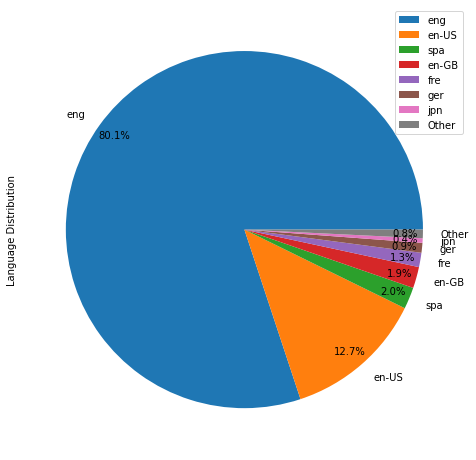

In [7]:
#Checking repartition of title or author would be irrelevant as they are meant for our understanding and not clustering

#Language repartition
AllLanguageDistribution = dfBooks.language_code.value_counts()
print("All languages and their number of appearance : \n",AllLanguageDistribution)
Nlang = AllLanguageDistribution.size
print("\n\nThere are : ",Nlang," different languages.\n\n")
TopLanguageDistribution = AllLanguageDistribution.head(7).append(pd.Series([AllLanguageDistribution.tail(Nlang-7).sum()],["Other"]))
TopLanguageDistribution.plot(kind='pie', figsize=(8,30), legend=True,autopct='%1.1f%%', 
                                                  pctdistance=0.9,radius=1,label="Language Distribution")

##### There does not seem to be any abnormal value in language, and as expected english is the main language

#### General Numerical fields :

In [8]:
dfBooks.describe()

,average_rating,num_pages,ratings_count,text_reviews_count
count,11127.000000,11127.000000,1.112700e+04,11127.000000
mean,3.933631,336.376921,1.793641e+04,541.854498
std,0.352445,241.127305,1.124794e+05,2576.176608
min,0.000000,0.000000,0.000000e+00,0.000000
25%,3.770000,192.000000,1.040000e+02,9.000000
50%,3.960000,299.000000,7.450000e+02,46.000000
75%,4.135000,416.000000,4.993500e+03,237.500000
max,5.000000,6576.000000,4.597666e+06,94265.000000


##### On a statistic basis the results seem normal for books, it tends to show that most books may be novels as the average number of pages is 336. There is more commitment from the reader for giving ratings than for posting reviews which is normal, as each book receive on average more than 1000 ratings we could use this to filter out irrevelant ratings.

#### Average Ratings

Text(0.5, 0, 'Rating')

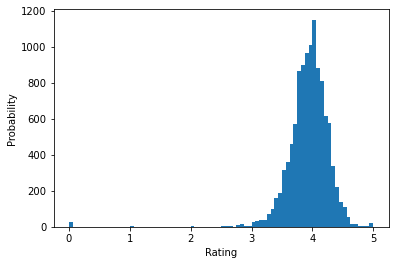

In [9]:
plt.hist(dfBooks.average_rating,bins=80)
plt.ylabel('Probability')
plt.xlabel('Rating')

<AxesSubplot:>

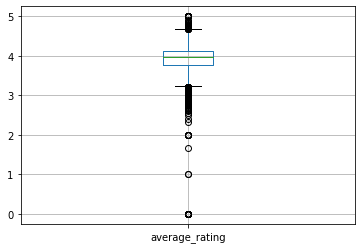

In [10]:
dfBooks.boxplot(column=['average_rating'])

Text(0.5, 0, 'Rating')

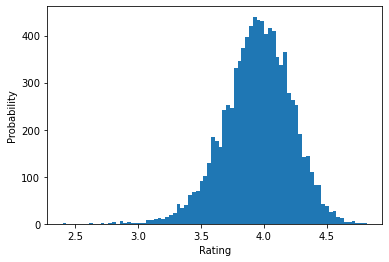

In [14]:
# Ratings distribution for books having more than 50 ratings
plt.hist(dfBooks.loc[dfBooks['ratings_count']>50].average_rating,bins=80)
plt.ylabel('Probability')
plt.xlabel('Rating')

##### We can see the ratings seem to follow a normal distribution centered on 3.9, by removing books having too little review it is even more visible

#### Top 10 Publishers :

In [20]:
dfBooks.publisher.value_counts().head(10)

Vintage             318
Penguin Books       261
Penguin Classics    184
Mariner Books       150
Ballantine Books    144
Harper Perennial    112
HarperCollins       112
Pocket Books        111
Bantam              110
VIZ Media LLC        88
Name: publisher, dtype: int64

In [22]:
dfBooks.groupby([dfBooks["publication_date"].dt.year, dfBooks["publication_date"].dt.month]).count().plot(kind="bar")

AttributeError: Can only use .dt accessor with datetimelike values

In [26]:
dfBooks.set_index('publication_date', inplace=True)
dfBooks.resample('M').size().plot.bar()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

Text(0.5, 0, 'Date')

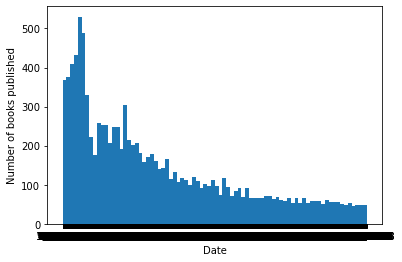

In [32]:
plt.hist(dfBooks.publication_date,bins=80)
plt.ylabel('Number of books published')
plt.xlabel('Date')

In [28]:
dfBooks

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publisher
publication_date,,,,,,,,
9/16/2006,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,Scholastic Inc.
9/1/2004,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,Scholastic Inc.
11/1/2003,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,Scholastic
5/1/2004,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,Scholastic Inc.
9/13/2004,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,Scholastic
...,...,...,...,...,...,...,...,...
12/21/2004,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,eng,512,156,20,Da Capo Press
12/1/1988,You Bright and Risen Angels,William T. Vollmann,4.08,eng,635,783,56,Penguin Books
8/1/1993,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,eng,415,820,95,Penguin Books
